In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
from matplotlib.pyplot import figure
#import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
soy = pd.read_csv("/Users/dianagonzales/Downloads/BRAZIl_SOY_2.6.0_tc/BRAZIL_SOY_2.6.0_tc.csv", sep=",")
coffee = pd.read_csv("/Users/dianagonzales/Downloads/COLOMBIA_COFFEE_1/COLOMBIA_COFFEE_1.0.2_tc.csv", sep=",")
cocoa = pd.read_csv("/Users/dianagonzales/Downloads/COTE_DIVOIRE_COCOA_1/COTE D'IVOIRE_COCOA_1.0.5_tc.csv", sep=",")
shrimp = pd.read_csv("/Users/dianagonzales/Downloads/ECUADOR_SHRIMP_1/ECUADOR_SHRIMP_1.0.1_tc.csv", sep=",")
beef = pd.read_csv("/Users/dianagonzales/Downloads/PARAGUAY_BEEF_1.2.4_pc/PARAGUAY_BEEF_1.2.4_pc.csv", sep=",")

In [3]:
soy = soy[soy['EXPORTER GROUP'] != 'DOMESTIC CONSUMPTION'] 
soy = soy[['YEAR','EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', 'TOTAL']]
soy = soy.groupby(['EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', 'YEAR']).sum('TOTAL')
soy.reset_index(inplace = True)

df = soy

# full set
exp_all = pd.DataFrame(df['EXPORTER GROUP'].unique())
imp_all = pd.DataFrame(df['COUNTRY OF FIRST IMPORT'].unique())

df_all = pd.merge(exp_all, imp_all, how="cross")

df_all.rename(columns = {"0_x":"EXPORTER GROUP", "0_y":"COUNTRY OF FIRST IMPORT"}, inplace=True)

df_all2 = [df['EXPORTER GROUP'].unique()].append(df['COUNTRY OF FIRST IMPORT'].unique())
df_all2 = df_all
df_all2['value'] = 0

soy_trade_adj = {}
soy_trade_list = {}

keys = list(range(2004,2021))

for i in range(0,17):
    df = soy
    hola = df_all.merge(df[df["YEAR"] == keys[i]], on=['EXPORTER GROUP','COUNTRY OF FIRST IMPORT'], how='left')
    hola.fillna(0, inplace=True)
    soy_trade_list[keys[i]] = hola
    hola = hola.pivot_table(columns='EXPORTER GROUP', index='COUNTRY OF FIRST IMPORT').reset_index()
    soy_trade_adj[keys[i]] = hola

    
hhi_soy = []

for i in range(0,17):
    d = soy_trade_list[keys[i]]
    d = d.groupby('EXPORTER GROUP').sum('TOTAL')
    d['share'] = (d['TOTAL'] / (sum(d['TOTAL']))) **2
    hhi_soy.append(sum(d['share']))
    
HHI_soy = pd.DataFrame(zip(keys,hhi_soy), columns=['YEAR', 'HHI'])
HHI_soy['COMMODITY'] = 'soy'
HHI_soy['METRIC'] = 'HHI'


net_soy = []

for i in range(2004,2020):
    prev = np.array(soy_trade_adj[i].set_index('COUNTRY OF FIRST IMPORT'))
    curr = np.array(soy_trade_adj[i+1].set_index('COUNTRY OF FIRST IMPORT'))
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev))
    total = change / maximum
    net_soy.append(total)
    
CHURN_soy = pd.DataFrame(zip(keys,net_soy), columns=['YEAR', 'HHI'])
CHURN_soy['COMMODITY'] = 'soy'
CHURN_soy['METRIC'] = 'market_churn'

In [4]:
coffee = coffee[['YEAR','EXPORTER GROUP', 'COUNTRY OF DESTINATION', 'TOTAL']]
coffee = coffee.groupby(['EXPORTER GROUP', 'COUNTRY OF DESTINATION', 'YEAR']).sum('TOTAL')
coffee.reset_index(inplace = True)

df = coffee

# full set
exp_all = pd.DataFrame(df['EXPORTER GROUP'].unique())
imp_all = pd.DataFrame(df['COUNTRY OF DESTINATION'].unique())

df_all = pd.merge(exp_all, imp_all, how="cross")

df_all.rename(columns = {"0_x":"EXPORTER GROUP", "0_y":'COUNTRY OF DESTINATION'}, inplace=True)

coffee_trade_adj = {}
coffee_trade_list = {}

keys = list(range(2012,2017))

for i in range(0,5):
    df = coffee
    hola = df_all.merge(df[df["YEAR"] == keys[i]], on=['EXPORTER GROUP','COUNTRY OF DESTINATION'], how='left')
    hola.fillna(0, inplace=True)
    coffee_trade_list[keys[i]] = hola
    hola = hola.pivot_table(columns='EXPORTER GROUP', index='COUNTRY OF DESTINATION').reset_index()
    coffee_trade_adj[keys[i]] = hola
    
    
hhi_coffee = []

for i in range(0,5):
    d = coffee_trade_list[keys[i]]
    d = d.groupby('EXPORTER GROUP').sum('TOTAL')
    d['share'] = (d['TOTAL'] / (sum(d['TOTAL']))) **2
    hhi_coffee.append(sum(d['share']))
    
HHI_coffee = pd.DataFrame(zip(keys,hhi_coffee), columns=['YEAR', 'HHI'])
HHI_coffee['COMMODITY'] = 'coffee'
HHI_coffee['METRIC'] = 'HHI' 

net_coffee = []

for i in range(2012,2016):
    prev = np.array(coffee_trade_adj[i].set_index('COUNTRY OF DESTINATION'))
    curr = np.array(coffee_trade_adj[i+1].set_index('COUNTRY OF DESTINATION'))
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev))
    total = change / maximum
    net_coffee.append(total)
    
CHURN_coffee = pd.DataFrame(zip(keys,net_coffee), columns=['YEAR', 'HHI'])
CHURN_coffee['COMMODITY'] = 'coffee'
CHURN_coffee['METRIC'] = 'market_churn'


In [5]:
cocoa = cocoa[['YEAR','EXPORTER GROUP', 'COUNTRY OF DESTINATION', 'TOTAL']]
cocoa = cocoa.groupby(['EXPORTER GROUP', 'COUNTRY OF DESTINATION', 'YEAR']).sum('TOTAL')
cocoa.reset_index(inplace = True)

df = cocoa

# full set
exp_all = pd.DataFrame(df['EXPORTER GROUP'].unique())
imp_all = pd.DataFrame(df['COUNTRY OF DESTINATION'].unique())

df_all = pd.merge(exp_all, imp_all, how="cross")

df_all.rename(columns = {"0_x":"EXPORTER GROUP", "0_y":'COUNTRY OF DESTINATION'}, inplace=True)

cocoa_trade_adj = {}
cocoa_trade_list = {}

keys = list(range(2016,2020))

for i in range(0,4):
    df = cocoa
    hola = df_all.merge(df[df["YEAR"] == keys[i]], on=['EXPORTER GROUP','COUNTRY OF DESTINATION'], how='left')
    hola.fillna(0, inplace=True)
    cocoa_trade_list[keys[i]] = hola
    hola = hola.pivot_table(columns='EXPORTER GROUP', index='COUNTRY OF DESTINATION').reset_index()
    cocoa_trade_adj[keys[i]] = hola
    
hhi_cocoa = []

for i in range(0,4):
    d = cocoa_trade_list[keys[i]]
    d = d.groupby('EXPORTER GROUP').sum('TOTAL')
    d['share'] = (d['TOTAL'] / (sum(d['TOTAL']))) **2
    hhi_cocoa.append(sum(d['share']))
    
HHI_cocoa = pd.DataFrame(zip(keys,hhi_cocoa), columns=['YEAR', 'HHI'])
HHI_cocoa['COMMODITY'] = 'cocoa' 
HHI_cocoa['METRIC'] = 'HHI' 

net_cocoa = []

for i in range(2016,2019):
    prev = np.array(cocoa_trade_adj[i].set_index('COUNTRY OF DESTINATION'))
    curr = np.array(cocoa_trade_adj[i+1].set_index('COUNTRY OF DESTINATION'))
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev))
    total = change / maximum
    net_cocoa.append(total)
    
CHURN_cocoa = pd.DataFrame(zip(keys,net_cocoa), columns=['YEAR', 'HHI'])
CHURN_cocoa['COMMODITY'] = 'cocoa'
CHURN_cocoa['METRIC'] = 'market_churn'

In [6]:
shrimp = shrimp[['YEAR','EXPORTER GROUP', 'COUNTRY OF DESTINATION', 'TOTAL']]
shrimp = shrimp.groupby(['EXPORTER GROUP', 'COUNTRY OF DESTINATION', 'YEAR']).sum('TOTAL')
shrimp.reset_index(inplace = True)

df = shrimp

# full set
exp_all = pd.DataFrame(df['EXPORTER GROUP'].unique())
imp_all = pd.DataFrame(df['COUNTRY OF DESTINATION'].unique())

df_all = pd.merge(exp_all, imp_all, how="cross")

df_all.rename(columns = {"0_x":"EXPORTER GROUP", "0_y":'COUNTRY OF DESTINATION'}, inplace=True)

shrimp_trade_adj = {}
shrimp_trade_list = {}

keys = list(range(2013,2020))

for i in range(0,7):
    df = shrimp
    hola = df_all.merge(df[df["YEAR"] == keys[i]], on=['EXPORTER GROUP','COUNTRY OF DESTINATION'], how='left')
    hola.fillna(0, inplace=True)
    shrimp_trade_list[keys[i]] = hola
    hola = hola.pivot_table(columns='EXPORTER GROUP', index='COUNTRY OF DESTINATION').reset_index()
    shrimp_trade_adj[keys[i]] = hola
    
    
hhi_shrimp = []

for i in range(0,7):
    d = shrimp_trade_list[keys[i]]
    d = d.groupby('EXPORTER GROUP').sum('TOTAL')
    d['share'] = (d['TOTAL'] / (sum(d['TOTAL']))) **2
    hhi_shrimp.append(sum(d['share']))
    
HHI_shrimp = pd.DataFrame(zip(keys,hhi_shrimp), columns=['YEAR', 'HHI'])
HHI_shrimp['COMMODITY'] = 'shrimp' 
HHI_shrimp['METRIC'] = 'HHI' 

net_shrimp = []

for i in range(2013,2019):
    prev = np.array(shrimp_trade_adj[i].set_index('COUNTRY OF DESTINATION'))
    curr = np.array(shrimp_trade_adj[i+1].set_index('COUNTRY OF DESTINATION'))
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev))
    total = change / maximum
    net_shrimp.append(total)
    
CHURN_shrimp = pd.DataFrame(zip(keys,net_shrimp), columns=['YEAR', 'HHI'])
CHURN_shrimp['COMMODITY'] = 'shrimp'
CHURN_shrimp['METRIC'] = 'market_churn'

In [7]:
beef = beef[['YEAR','EXPORTER GROUP', 'COUNTRY OF DESTINATION', 'BEEF_EQUIVALENT_TONNES']]
beef = beef.groupby(['EXPORTER GROUP', 'COUNTRY OF DESTINATION', 'YEAR']).sum('BEEF_EQUIVALENT_TONNES')
beef.reset_index(inplace = True)

df = beef

# full set
exp_all = pd.DataFrame(df['EXPORTER GROUP'].unique())
imp_all = pd.DataFrame(df['COUNTRY OF DESTINATION'].unique())

df_all = pd.merge(exp_all, imp_all, how="cross")

df_all.rename(columns = {"0_x":"EXPORTER GROUP", "0_y":'COUNTRY OF DESTINATION'}, inplace=True)

beef_trade_adj = {}
beef_trade_list = {}

keys = list(range(2014,2020))

for i in range(0,6):
    df = beef
    hola = df_all.merge(df[df["YEAR"] == keys[i]], on=['EXPORTER GROUP','COUNTRY OF DESTINATION'], how='left')
    hola.fillna(0, inplace=True)
    beef_trade_list[keys[i]] = hola
    hola = hola.pivot_table(columns='EXPORTER GROUP', index='COUNTRY OF DESTINATION').reset_index()
    beef_trade_adj[keys[i]] = hola
    
    
hhi_beef = []

for i in range(0,6):
    d = beef_trade_list[keys[i]]
    d = d.groupby('EXPORTER GROUP').sum('BEEF_EQUIVALENT_TONNES')
    d['share'] = (d['BEEF_EQUIVALENT_TONNES'] / (sum(d['BEEF_EQUIVALENT_TONNES']))) **2
    hhi_beef.append(sum(d['share']))
    
HHI_beef = pd.DataFrame(zip(keys,hhi_beef), columns=['YEAR', 'HHI'])
HHI_beef['COMMODITY'] = 'beef'
HHI_beef['METRIC'] = 'HHI' 

net_beef = []

for i in range(2014,2019):
    prev = np.array(beef_trade_adj[i].set_index('COUNTRY OF DESTINATION'))
    curr = np.array(beef_trade_adj[i+1].set_index('COUNTRY OF DESTINATION'))
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev))
    total = change / maximum
    net_beef.append(total)
    
CHURN_beef = pd.DataFrame(zip(keys,net_shrimp), columns=['YEAR', 'HHI'])
CHURN_beef['COMMODITY'] = 'beef'
CHURN_beef['METRIC'] = 'market_churn'

<AxesSubplot:xlabel='YEAR', ylabel='HHI'>

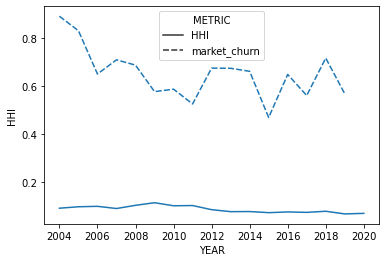

In [12]:
HHI = pd.concat([HHI_soy, HHI_coffee, HHI_cocoa, HHI_shrimp, HHI_beef, 
                 CHURN_soy, CHURN_coffee, CHURN_cocoa, CHURN_shrimp, CHURN_beef])
sns.lineplot(data=HHI[HHI['COMMODITY'] == 'soy'], y='HHI', x='YEAR',  style='METRIC') # hue = 'COMMODITY',

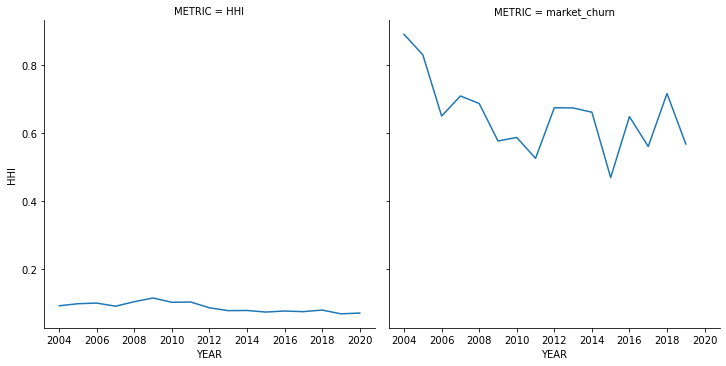

In [10]:
sns.relplot(
    data=HHI[HHI['COMMODITY'] == 'soy'], x="YEAR", y="HHI",
    col="METRIC", #hue="COMMODITY", #style="event",
    kind="line"
)

In [ ]:
dsoy = soy_trade_list[2020]
dsoy = dsoy.groupby(['EXPORTER GROUP', 'YEAR']).sum('TOTAL').reset_index()
dsoy['RANK'] = dsoy.groupby('YEAR')['TOTAL'].rank(ascending=False)
dsoy['COMMODITY'] = "soy"


dsoy18 = soy_trade_list[2018]
dsoy18 = dsoy18.groupby(['EXPORTER GROUP', 'YEAR']).sum('TOTAL').reset_index()
dsoy18['RANK'] = dsoy18.groupby('YEAR')['TOTAL'].rank(ascending=False)
dsoy18['COMMODITY'] = "soy"

dsoy19 = soy_trade_list[2019]
dsoy19 = dsoy19.groupby(['EXPORTER GROUP', 'YEAR']).sum('TOTAL').reset_index()
dsoy19['RANK'] = dsoy19.groupby('YEAR')['TOTAL'].rank(ascending=False)
dsoy19['COMMODITY'] = "soy"

RANK = pd.concat([dsoy18, dsoy19, dsoy])


In [ ]:
sns.lineplot(data=RANK[RANK['RANK']<30], y='TOTAL', x='RANK', hue = 'YEAR')

In [ ]:
grafos = {}

keys = list(range(2004,2021))
diana = soy

for i in range(0,17):
    df = diana[diana["YEAR"] == keys[i]]
    
    alan = []
    for row in df.index:
        alan.append((df["EXPORTER GROUP"][row], df["COUNTRY OF FIRST IMPORT"][row], {'weight': df["TOTAL"][row]})) 

    B = nx.Graph()
    B.add_nodes_from(df['EXPORTER GROUP'].unique().tolist(), bipartite=0)
    B.add_nodes_from(df['COUNTRY OF FIRST IMPORT'].unique().tolist(), bipartite=1)
    B.add_edges_from(alan)
    grafos[keys[i]] = B

In [ ]:
am = grafos[2020]
firms = dsoy[dsoy['RANK']<30]['EXPORTER GROUP']
deg = pd.DataFrame(am.degree(firms), columns=['EXPORTER GROUP', 'DEGREE'])
dsoy = dsoy.merge(deg, on='EXPORTER GROUP', how='left')

am19 = grafos[2019]
firms19 = dsoy19[dsoy19['RANK']<30]['EXPORTER GROUP']
deg19 = pd.DataFrame(am19.degree(firms19), columns=['EXPORTER GROUP', 'DEGREE'])
dsoy19 = dsoy19.merge(deg, on='EXPORTER GROUP', how='left')
dsoy19

am18 = grafos[2018]
firms18 = dsoy18[dsoy18['RANK']<30]['EXPORTER GROUP']
deg18 = pd.DataFrame(am18.degree(firms18), columns=['EXPORTER GROUP', 'DEGREE'])
dsoy18 = dsoy18.merge(deg, on='EXPORTER GROUP', how='left')
dsoy18

DEGREE = pd.concat([dsoy18, dsoy19, dsoy])

In [ ]:
sns.lineplot(data=DEGREE[(DEGREE['RANK']<30) & (DEGREE['RANK']>0)], y='DEGREE', x='RANK', hue = 'YEAR')

In [ ]:
dsoy19[dsoy19['RANK']<30]

In [ ]:
RANK = pd.concat([dsoy18, dsoy19, dsoy])

In [ ]:
firms = RANK[RANK['RANK']<10]['EXPORTER GROUP']
firms

In [ ]:
trade_adj = {}
trade_list = {}

keys = list(range(2004,2021))

for i in range(0,17):
    hola = df_all.merge(df[df["YEAR"] == keys[i]], on=['EXPORTER GROUP','COUNTRY OF FIRST IMPORT'], how='left')
    hola.fillna(0, inplace=True)
    trade_list[keys[i]] = hola
    hola = hola.pivot_table(columns='EXPORTER GROUP', index='COUNTRY OF FIRST IMPORT').reset_index()
    trade_adj[keys[i]] = hola

In [ ]:
df = pd.read_csv("/Users/dianagonzales/Downloads/BRAZIl_SOY_2.6.0_tc/BRAZIL_SOY_2.6.0_tc.csv", sep=",")
#df = df[df["YEAR"] == 2020]
df = df[['YEAR','EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', 'TOTAL']]
df = df.groupby(['EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', 'YEAR']).sum('TOTAL')
df.reset_index(inplace = True)

In [ ]:
# full set
exp_all = pd.DataFrame(df['EXPORTER GROUP'].unique())
imp_all = pd.DataFrame(df['COUNTRY OF FIRST IMPORT'].unique())

df_all = pd.merge(exp_all, imp_all, how="cross")

df_all.rename(columns = {"0_x":"EXPORTER GROUP", "0_y":"COUNTRY OF FIRST IMPORT"}, inplace=True)

In [ ]:
d2020 = df_all.merge(df[df["YEAR"] == 2004], on=['EXPORTER GROUP','COUNTRY OF FIRST IMPORT'], how='left')
d2020['TOTAL'].fillna(0, inplace=True)
d2020['net'] = sum(d2020['TOTAL'])
d2020['share'] = (d2020['TOTAL'] / d2020['net']) ** 2
d2020.sort_values('TOTAL', ascending=False)

sum(d2020['share'])

In [ ]:
trade_adj = {}
trade_list = {}

keys = list(range(2004,2021))

for i in range(0,17):
    hola = df_all.merge(df[df["YEAR"] == keys[i]], on=['EXPORTER GROUP','COUNTRY OF FIRST IMPORT'], how='left')
    hola.fillna(0, inplace=True)
    trade_list[keys[i]] = hola
    hola = hola.pivot_table(columns='EXPORTER GROUP', index='COUNTRY OF FIRST IMPORT').reset_index()
    trade_adj[keys[i]] = hola

In [ ]:
hhi = []

for i in range(0,17):
    d = trade_list[keys[i]]
    d['share'] = (d['TOTAL'] / (sum(d['TOTAL']))) **2
    hhi.append(sum(d['share']))
    
HHI = pd.DataFrame(zip(keys,hhi), columns=['YEAR', 'HHI'])
#HHI 

In [ ]:
trade_adj[2010]

In [ ]:
net = []

for i in range(0,17):
    prev = np.array(trade_adj[2010].set_index('COUNTRY OF FIRST IMPORT'))
    curr = np.array(trade_adj[2011].set_index('COUNTRY OF FIRST IMPORT'))
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev))
    total = change / maximum
    net.append(total)
    
CHURN = pd.DataFrame(zip(keys,net), columns=['YEAR', 'HHI'])

In [ ]:
soy

In [ ]:
trade_adj[2010]

In [ ]:
dist = []

for i in range(0,16):
    prev = trade_adj[keys[i]]
    curr = trade_adj[keys[i+1]]
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev)) + sum(sum(curr))
    dist.append(change)
    
dist
  

In [ ]:
d2020 = trade_list[2020]
d2020['share'] = (d2020['TOTAL'] / (sum(d2020['TOTAL']))) **2
sum(d2020['share'])

In [ ]:
grafos = {}

keys = list(range(2004,2021))
diana = soy

for i in range(0,17):
    df = diana[diana["YEAR"] == keys[i]]
    
    alan = []
    for j in range(0, len(df)):
        alan.append((df.loc[j]["EXPORTER GROUP"], df.loc[j]["COUNTRY OF FIRST IMPORT"], {'exports': df.loc[j]["TOTAL"]})) 
    
    B = nx.Graph()
    B.add_nodes_from(df['EXPORTER GROUP'].unique().tolist())
    B.add_nodes_from(df['COUNTRY OF FIRST IMPORT'].unique().tolist())
    B.add_edges_from(alan)
    grafos[keys[i]] = B


In [ ]:
grafos

In [ ]:
alan = []
for i in range(0, len(df)):
    alan.append((df.loc[i]["EXPORTER GROUP"], df.loc[i]["COUNTRY OF FIRST IMPORT"], {'exports': df.loc[i]["TOTAL"]}))    

In [ ]:
B = nx.Graph()

B.add_nodes_from(df['EXPORTER GROUP'].unique().tolist(), bipartite="firm")
B.add_nodes_from(df['COUNTRY OF FIRST IMPORT'].unique().tolist(), bipartite="country")
B.add_edges_from(alan)

In [ ]:
B.nodes(data=True)

In [ ]:
firm_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == "firm"}
country_nodes = set(B) - firm_nodes

In [ ]:
country_nodes

In [ ]:
a = nx.generate_adjlist(B)


In [ ]:
nx.degree_centrality(B)

In [ ]:
#nodos = {}
#for x in B.nodes:
#    nodos[x] = len(B[x])
#s = pd.Series(nodos, name='connections')
#df2 = s.to_frame().sort_values('connections', ascending=False)

In [ ]:
#one = df2[df2['connections'] == 1].index.to_list()

In [ ]:
#df3 = df[~df['EXPORTER GROUP'].isin(one)]

In [ ]:
#G = nx.from_pandas_edgelist(df3, 'EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', ['TOTAL'])
figure(figsize=(10, 8))
nx.draw_shell(B, with_labels=False)

In [ ]:
if self.time > 0:
            prev = nx.adjacency_matrix(self.graphs[-1]).A
            curr = nx.adjacency_matrix(self.G).A
            change = sum(sum(abs(curr - prev)))
            maximum = sum(sum(prev)) + sum(sum(curr))
            self.diff = change/maximum if maximum > 0 else 0
        self.graphs.append(self.G.copy())
        


In [ ]:
len(df['EXPORTER GROUP'].unique()) * len(df['COUNTRY OF FIRST IMPORT'].unique())

In [ ]:
df_all.merge()